<a href="https://colab.research.google.com/github/kiran-pyt/Nonlinear-Dynamic-Soft-Sensor-Modeling-With-Supervised-Machine-Learning-Techniques/blob/main/Butane_Concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator,RegressorMixin
from sklearn.datasets import load_diabetes,load_digits
#from sklearn.tree import export_grapviz
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from math import sqrt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
import math
import seaborn as sns
import missingno as msno


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/debutnizer/Debutanizer_Data.csv")

In [ ]:
df.columns=["Top_Temperature","Top_Pressure","Flow_of_Reflux","Flow_to_the_next_process","Temperature_of_the_sixth_tray","Temperature_A_at_Bottom","Temperature_B_at_Bottom","Butane_Concentration"]

In [ ]:
df.head()

,Top_Temperature,Top_Pressure,Flow_of_Reflux,Flow_to_the_next_process,Temperature_of_the_sixth_tray,Temperature_A_at_Bottom,Temperature_B_at_Bottom,Butane_Concentration
0,0.269,0.651,0.833,0.583,0.785,0.843,0.822,0.180
1,0.268,0.650,0.852,0.578,0.776,0.839,0.822,0.177
2,0.268,0.660,0.824,0.572,0.765,0.808,0.786,0.174
3,0.267,0.668,0.808,0.566,0.753,0.800,0.786,0.172
4,0.267,0.647,0.762,0.560,0.745,0.773,0.746,0.167


In [ ]:
df.describe()

,Top_Temperature,Top_Pressure,Flow_of_Reflux,Flow_to_the_next_process,Temperature_of_the_sixth_tray,Temperature_A_at_Bottom,Temperature_B_at_Bottom,Butane_Concentration
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,0.283882,0.667845,0.598462,0.435952,0.658082,0.620737,0.589403,0.267789
std,0.103127,0.057695,0.198576,0.138237,0.127047,0.165110,0.173248,0.158946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224000,0.654000,0.500000,0.363000,0.609000,0.482000,0.445000,0.169000
50%,0.264000,0.672000,0.624000,0.396000,0.695000,0.639500,0.601000,0.247000
75%,0.325750,0.691000,0.742750,0.518000,0.730000,0.755000,0.741000,0.318000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(df.columns)

8

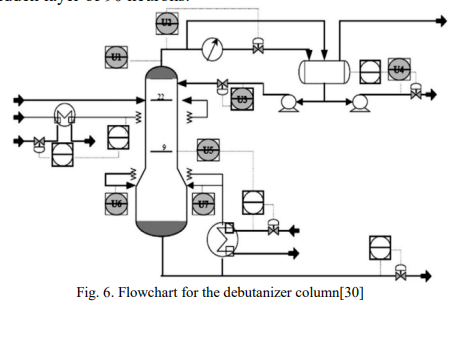



Debutanizer is an important part of desulfurization and
naphtha separation units in petroleum production processes.
Fig. 6 shows the basic flowchart of the debutanizer column. It is
mainly used to separate C5 from C3 and C4. It removes C3 and
most C4 from the top, as well as C5 and a small amount of
residual C4 at the bottom. Since the bottom butane
concentration has a great influence on the debutanizer column
and it is difficult to measure it directly, it needs to be strictly
detected and controlled. For the debutanizer column, it is
important and necessary to provide real-time prediction of the
butane concentration for effective control and optimization.
Thus, virtual sensors are exploited to predict the butane
concentration. To predict the butane concentration of the
process, seven routinely measured process variables that are
highly related with the quality variable has been selected as the
inputs for virtual sensors

In [ ]:
df.shape

(2394, 8)

In [ ]:
def missing_values_table(df):
    #Total missing values
    mis_val=df.isnull().sum()
    # Percentage of missing values

    mis_val_percent=100*mis_val/len(df)

    # Make a table with the results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

     # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


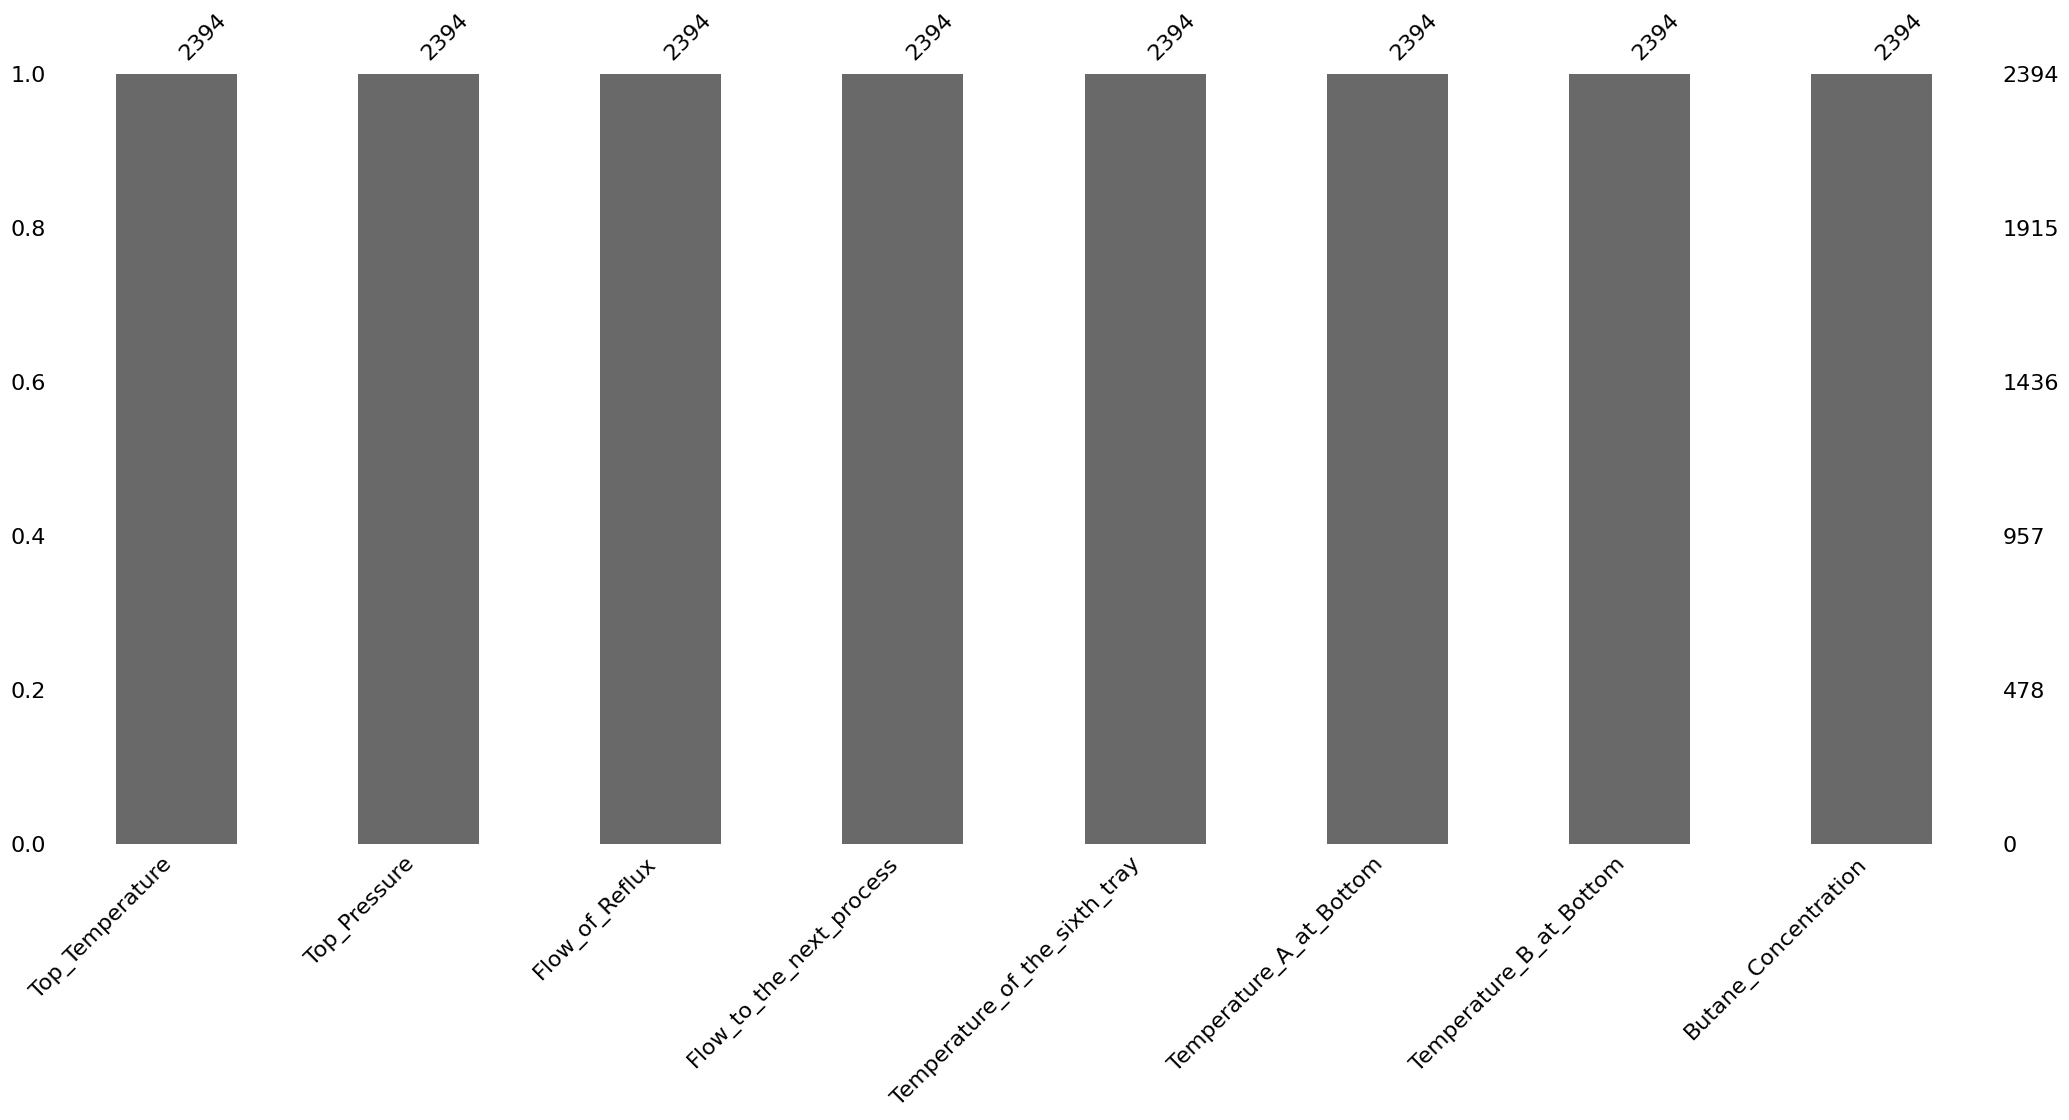

<Figure size 1200x800 with 0 Axes>

In [ ]:
msno.bar(df)
plt.figure(figsize=(12,8))  # Replace 'width' and 'height' with the desired dimensions in inches

# Show the plot
plt.show()

<Axes: >

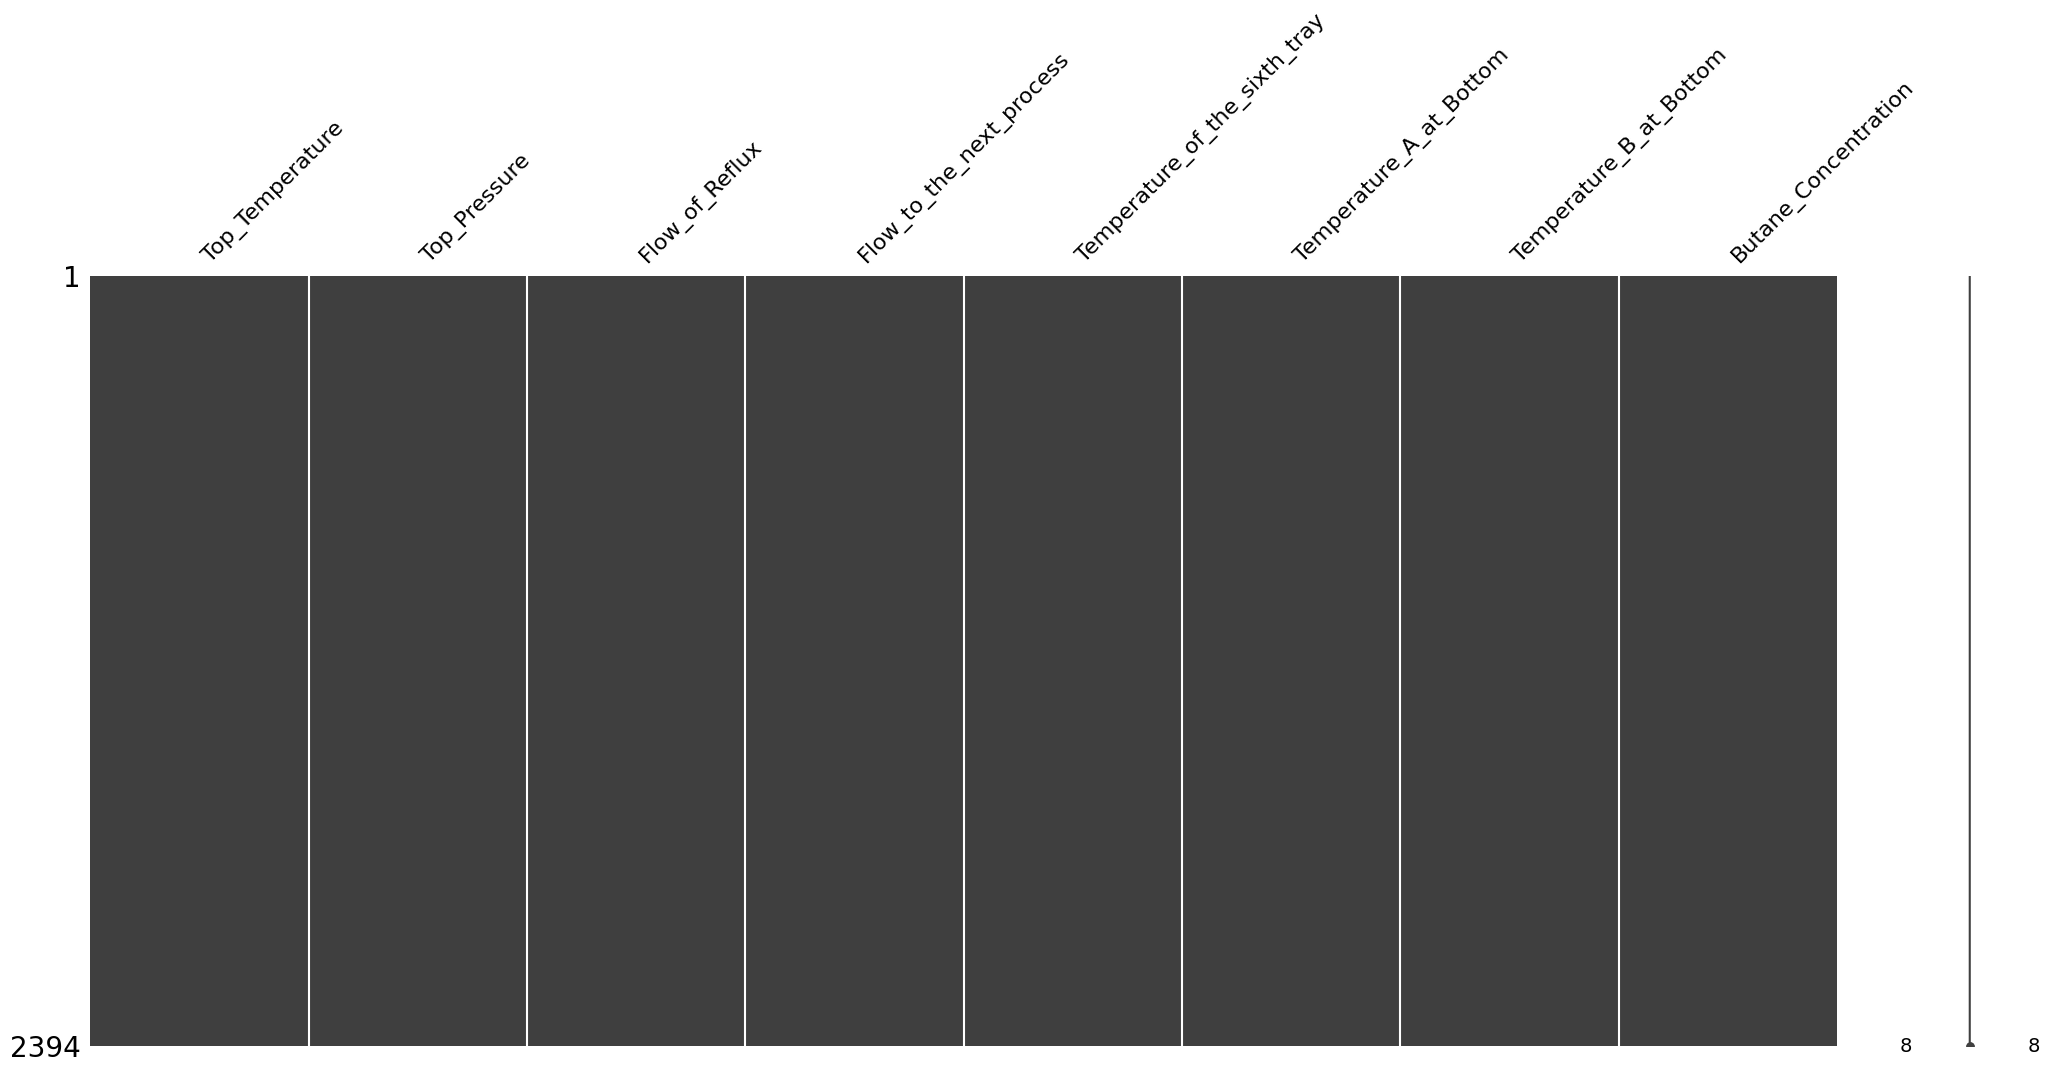

In [ ]:
msno.matrix(df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

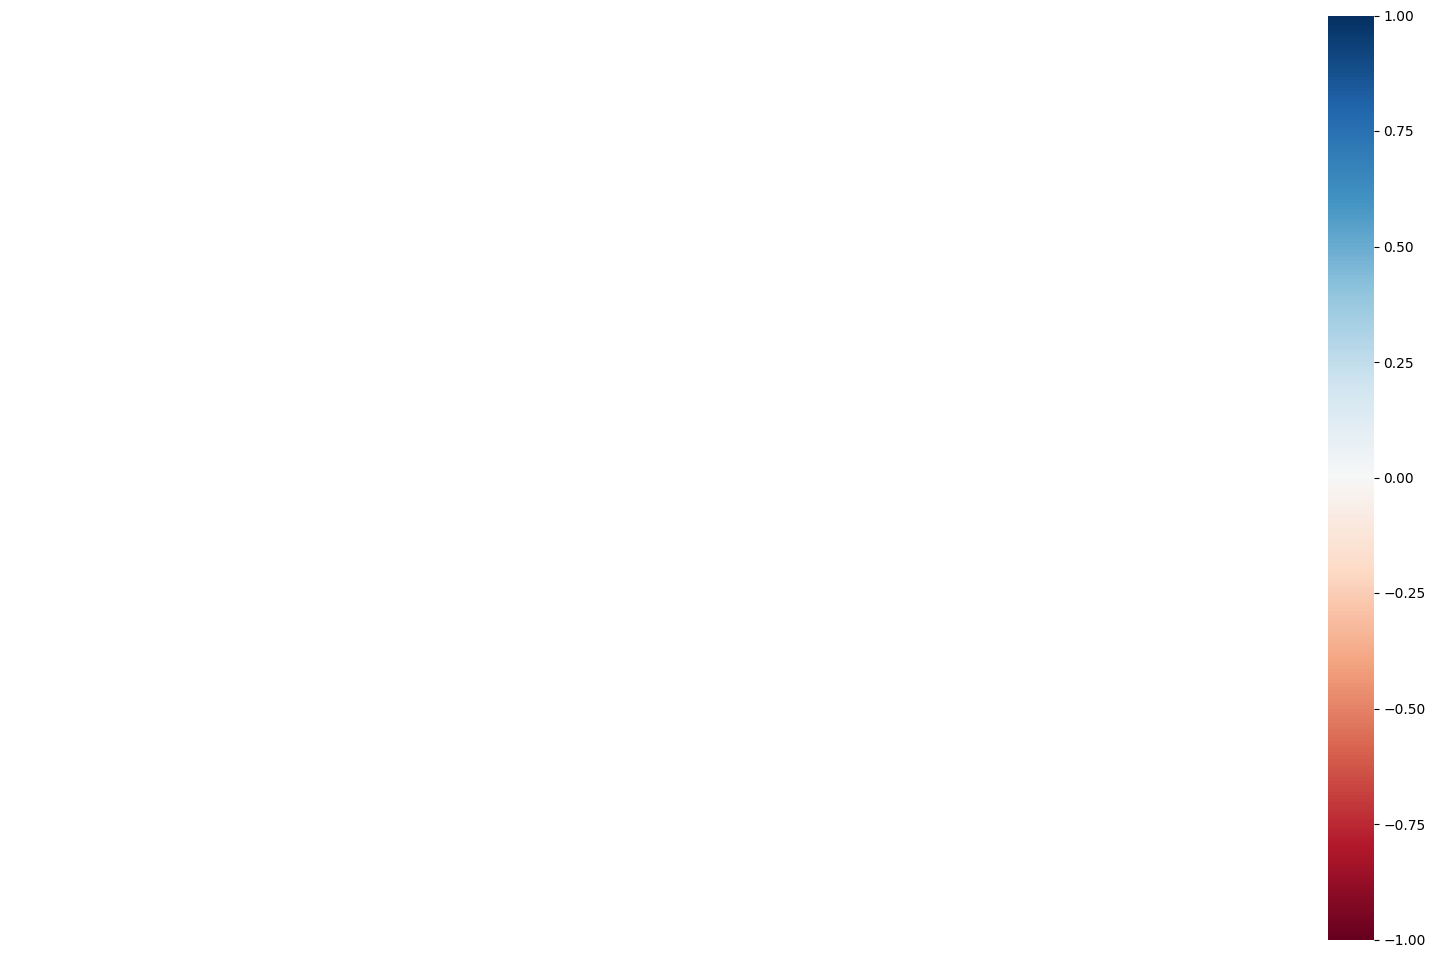

In [ ]:
msno.heatmap(df)

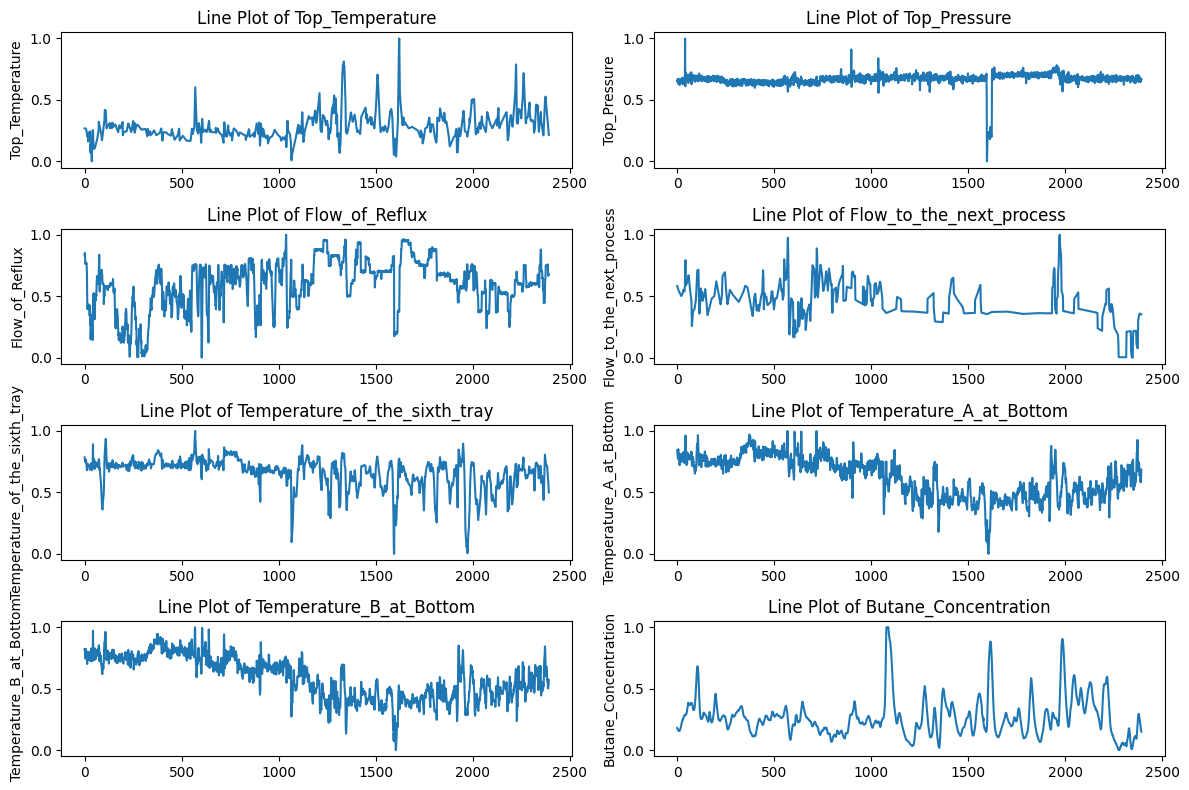

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.lineplot(data=df, x=df.index, y=feature, ax=ax)  # Assuming a time-based index
    ax.set_title(f'Line Plot of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Top_Temperature', 'Top_Pressure', 'Flow_of_Reflux',
       'Flow_to_the_next_process', 'Temperature_of_the_sixth_tray',
       'Temperature_A_at_Bottom', 'Temperature_B_at_Bottom',
       'Butane_Concentration'],
      dtype='object')

Number of features: 8
Total number of subplots: 8


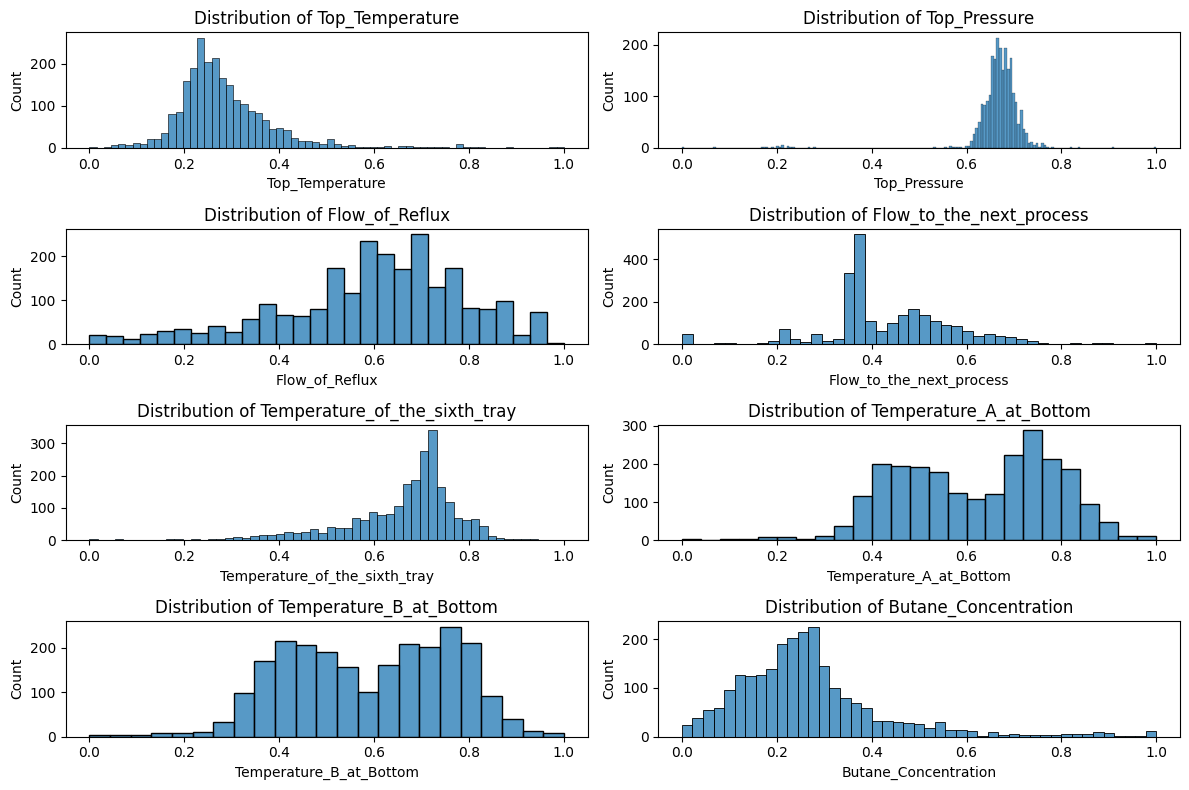

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

print(f"Number of features: {num_features}")
print(f"Total number of subplots: {num_rows * num_cols}")

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
        print(f"Removed subplot at index {i}")

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(df[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


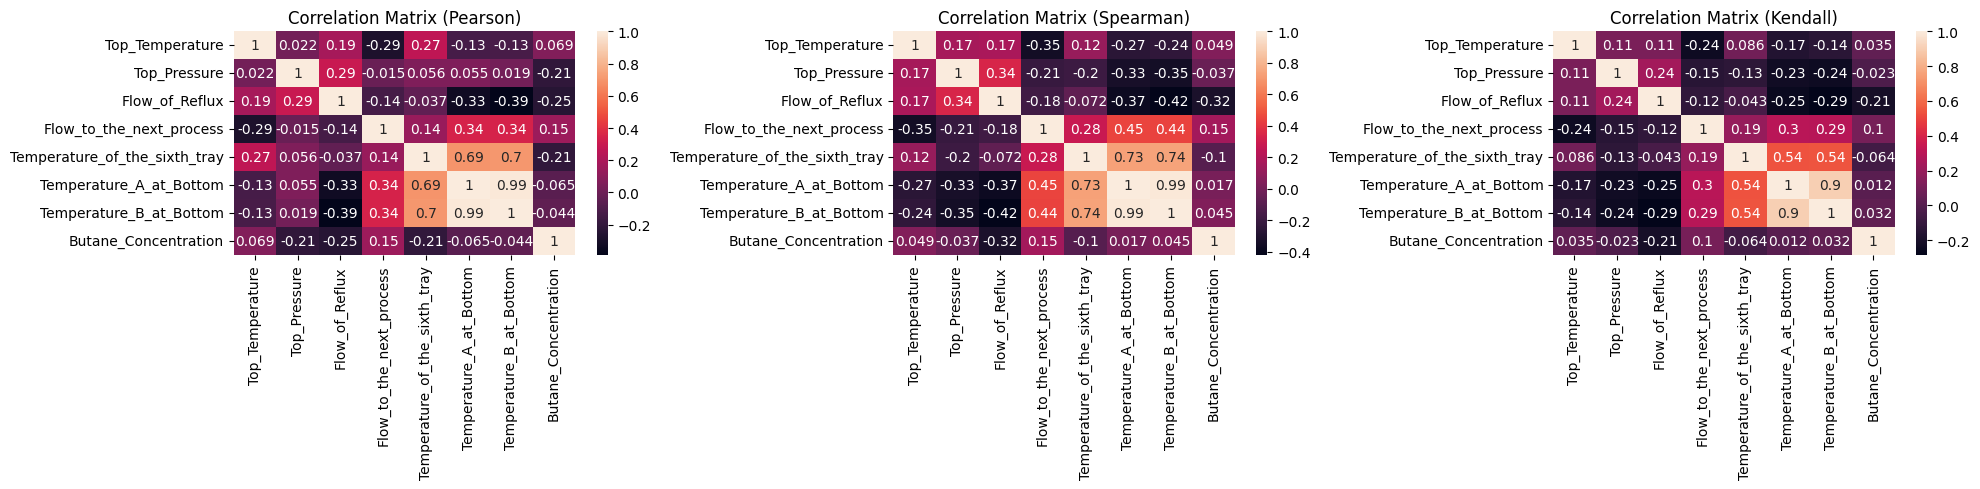

In [ ]:
# Create a list of correlation methods
methods = ['pearson', 'spearman', 'kendall']

# Set the figure size
plt.figure(figsize=(20, 5))

# Create subplots for each correlation method
for i, method in enumerate(methods):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, index i + 1
    sns.heatmap(df.corr(method=method), annot=True, annot_kws={'size': 10})
    plt.title(f'Correlation Matrix ({method.capitalize()})')

plt.tight_layout()
plt.show()


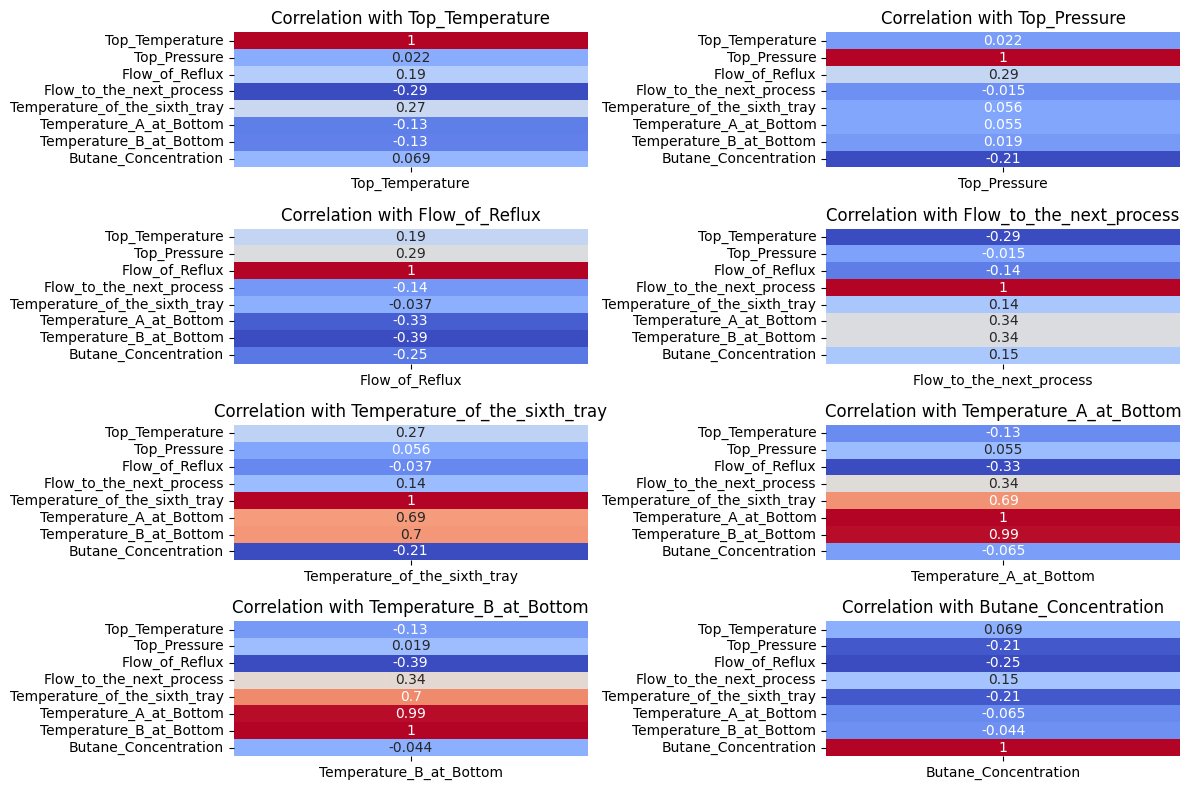

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
correlation_matrix = df.corr()

# Get the number of features and set the number of columns for subplots
num_features = len(correlation_matrix.columns)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Plot correlation matrices
features = correlation_matrix.columns
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.heatmap(correlation_matrix.loc[[feature]].T, annot=True, cmap='coolwarm', cbar=False, ax=ax)
    ax.set_title(f'Correlation with {feature}')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Top_Temperature', 'Top_Pressure', 'Flow_of_Reflux',
       'Flow_to_the_next_process', 'Temperature_of_the_sixth_tray',
       'Temperature_A_at_Bottom', 'Temperature_B_at_Bottom',
       'Butane_Concentration'],
      dtype='object')

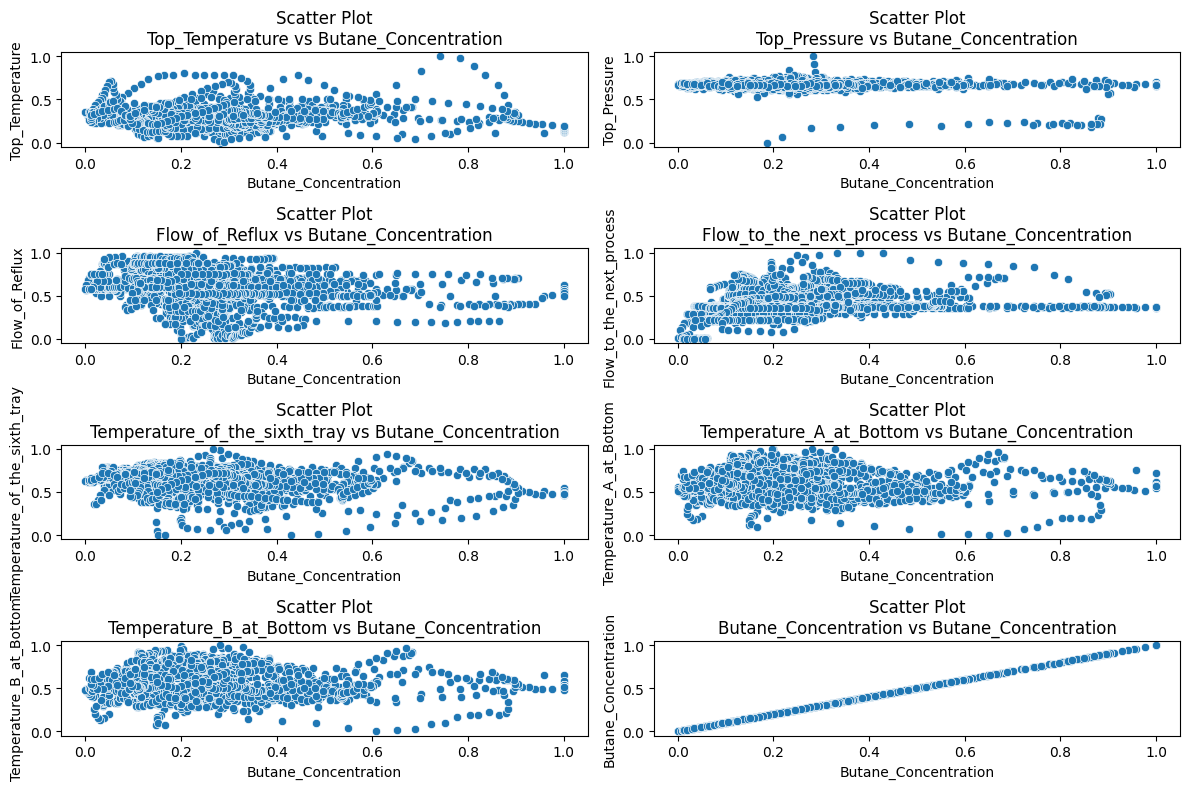

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=df, x="Butane_Concentration", y=df[feature], ax=ax)
    ax.set_title(f'Scatter Plot\n{feature} vs Butane_Concentration')

plt.tight_layout()
plt.show()


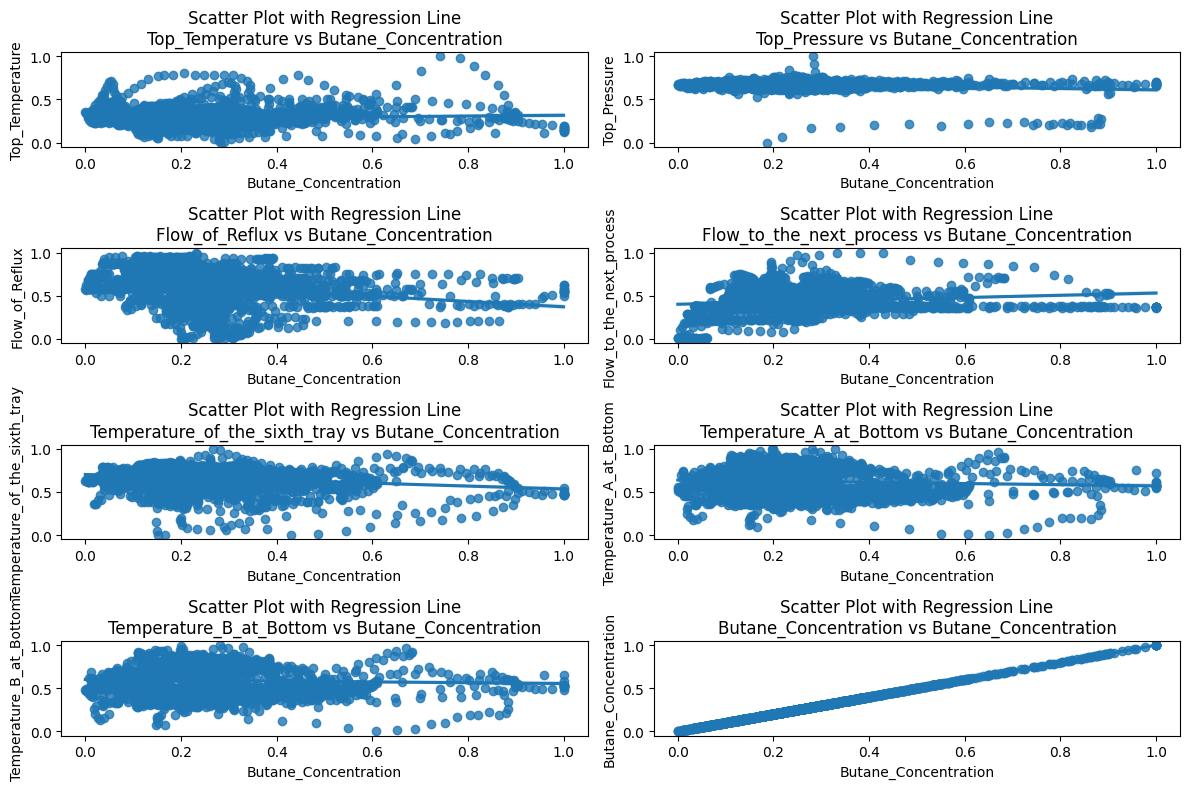

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create a scatter plot with a regression line
    sns.regplot(data=df, x="Butane_Concentration", y=feature, ax=ax)

    ax.set_title(f'Scatter Plot with Regression Line\n{feature} vs Butane_Concentration')

plt.tight_layout()
plt.show()


Top Temperature and Butane Concentration are Postively correlated

Top Pressure and Butane Concentration are Negitvely correlated (We need check feed conditions)

Reflux and Butane Concentration are Negitvely correlated (causlity condition)

Flow to next processand Butane Concentration are Postively correlated

sixith tray and Butane Concentration are Negitvely correlated

Bottom Temperatrure and concentraion are negtively correlated






In [ ]:
X=df.iloc[:, :-1]
y=df["Butane_Concentration"]


# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a k-fold cross-validator
k_folds = 5  # You can change this to the desired number of folds
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Lists to store results
cv_results = []  # To store cross-validation results
best_models = []  # To store best models for each fold

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

     # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the search
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Predict on the validation set
    y_pred = best_model.predict(X_val)

 # Calculate mean squared error and store the result
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    cv_results.append((mse, r2))

# Print cross-validation results
for fold, (mse, r2) in enumerate(cv_results, start=1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.2f}, R-squared = {r2:.2f}")

# Get the average mean squared error and average R-squared across all folds
average_mse = sum(mse for mse, _ in cv_results) / len(cv_results)
average_r2 = sum(r2 for _, r2 in cv_results) / len(cv_results)

print(f"Average Mean Squared Error: {average_mse:.2f}")
print(f"Average R-squared: {average_r2:.2f}")

Fold 1: Mean Squared Error = 0.01, R-squared = 0.75
Fold 2: Mean Squared Error = 0.01, R-squared = 0.76
Fold 3: Mean Squared Error = 0.00, R-squared = 0.82
Fold 4: Mean Squared Error = 0.00, R-squared = 0.84
Fold 5: Mean Squared Error = 0.00, R-squared = 0.82
Average Mean Squared Error: 0.01
Average R-squared: 0.80


Fold 1: Mean Squared Error = 0.01, R-squared = 0.75
Fold 2: Mean Squared Error = 0.01, R-squared = 0.77
Fold 3: Mean Squared Error = 0.00, R-squared = 0.82
Fold 4: Mean Squared Error = 0.00, R-squared = 0.84
Fold 5: Mean Squared Error = 0.00, R-squared = 0.81
Average Mean Squared Error: 0.01
Average R-squared: 0.80


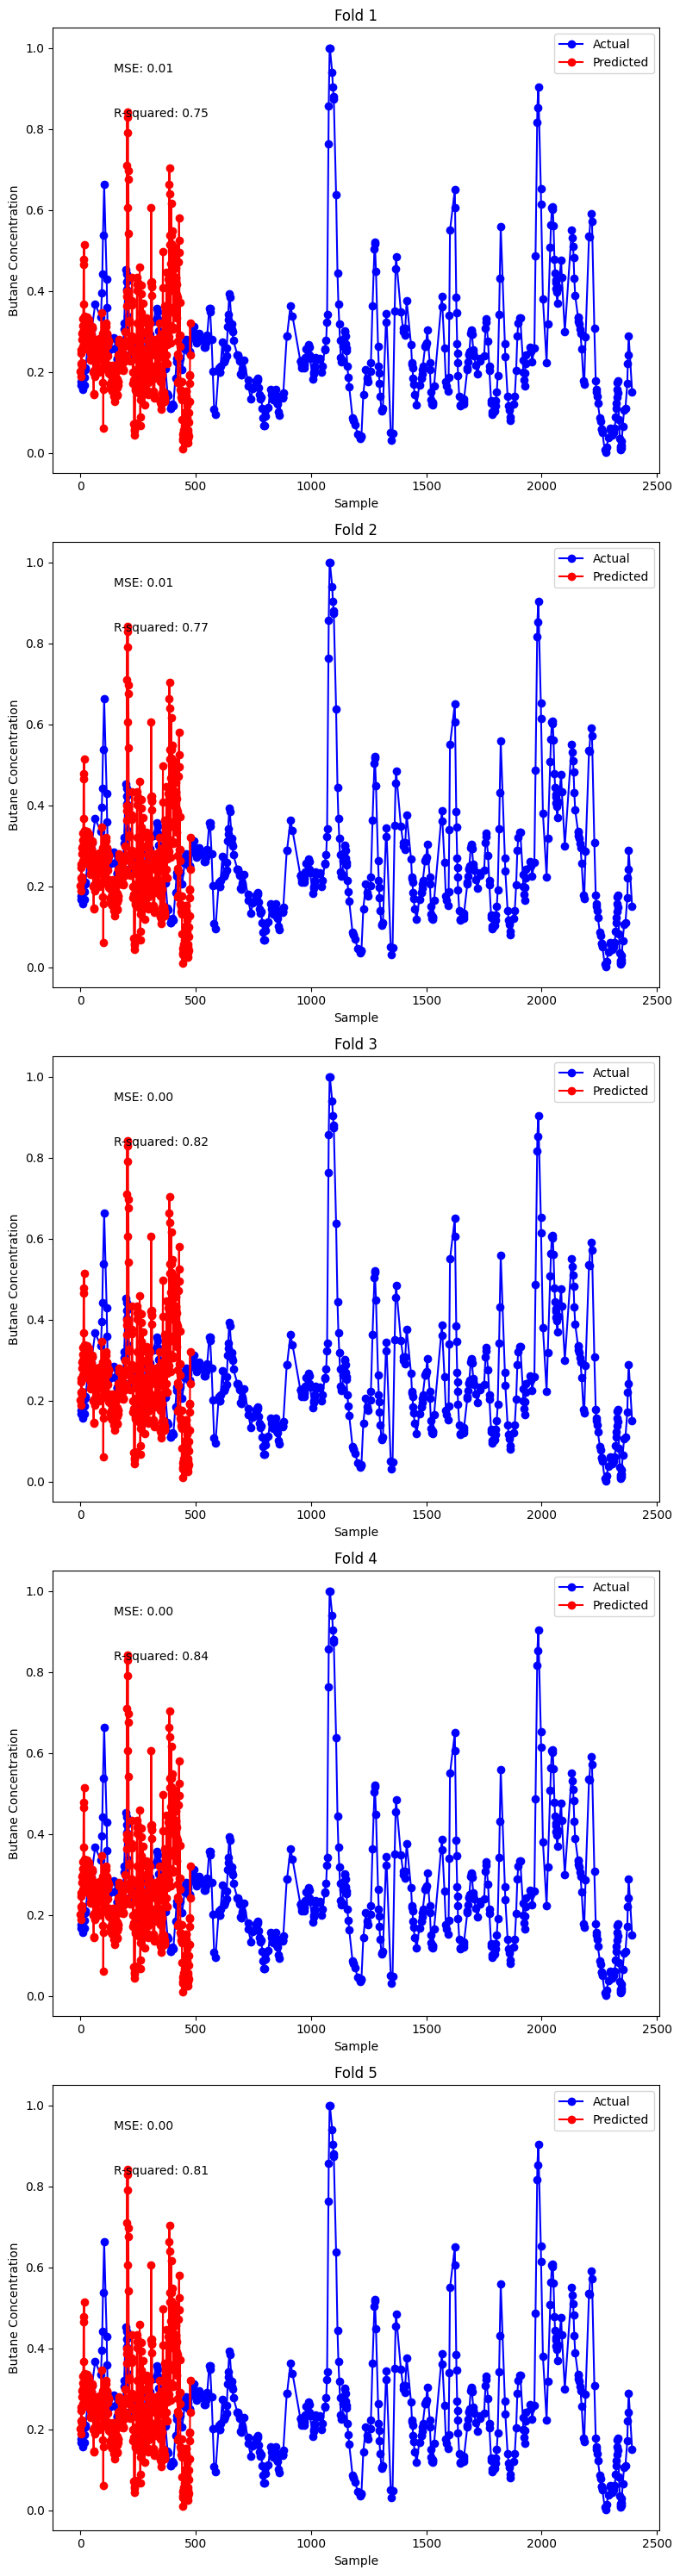

In [ ]:
X=df.iloc[:, :-1]
y=df["Butane_Concentration"]


# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a k-fold cross-validator
k_folds = 5  # You can change this to the desired number of folds
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Lists to store results
cv_results = []  # To store cross-validation results
best_models = []  # To store best models for each fold

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

     # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the search
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Predict on the validation set
    y_pred = best_model.predict(X_val)

 # Calculate mean squared error and store the result
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    cv_results.append((mse, r2))

# Print cross-validation results
for fold, (mse, r2) in enumerate(cv_results, start=1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.2f}, R-squared = {r2:.2f}")

# Get the average mean squared error and average R-squared across all folds
average_mse = sum(mse for mse, _ in cv_results) / len(cv_results)
average_r2 = sum(r2 for _, r2 in cv_results) / len(cv_results)

print(f"Average Mean Squared Error: {average_mse:.2f}")
print(f"Average R-squared: {average_r2:.2f}")


import matplotlib.pyplot as plt

# ... (previous code)

# Create subplots for each fold
fig, axes = plt.subplots(nrows=k_folds, ncols=1, figsize=(8, 6 * k_folds))

for fold, (mse, r2) in enumerate(cv_results, start=1):
    ax = axes[fold - 1]
    ax.plot(y_val, label="Actual", marker='o', linestyle='-', color='b')
    ax.plot(y_pred, label="Predicted", marker='o', linestyle='-', color='r')
    ax.set_title(f"Fold {fold}")
    ax.set_xlabel("Sample")
    ax.set_ylabel("Butane Concentration")
    ax.legend()

    # Print mean squared error and R-squared on each subplot
    ax.text(0.1, 0.9, f"MSE: {mse:.2f}", transform=ax.transAxes)
    ax.text(0.1, 0.8, f"R-squared: {r2:.2f}", transform=ax.transAxes)

# Adjust subplot layout
plt.tight_layout()

# Display the subplots
plt.show()









In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

X=df.iloc[:, :-1]
y=df["Butane_Concentration"]

# Create an AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create a k-fold cross-validator
k_folds = 5  # You can change this to the desired number of folds
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Lists to store results
cv_results = []  # To store cross-validation results
best_models = []  # To store best models for each fold

# Perform k-fold cross-validation with hyperparameter tuning
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the search
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Predict on the validation set
    y_pred = best_model.predict(X_val)

 # Calculate mean squared error and store the result
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    cv_results.append((mse, r2))

# Print cross-validation results
for fold, (mse, r2) in enumerate(cv_results, start=1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.2f}, R-squared = {r2:.2f}")

# Get the average mean squared error and average R-squared across all folds
average_mse = sum(mse for mse, _ in cv_results) / len(cv_results)
average_r2 = sum(r2 for _, r2 in cv_results) / len(cv_results)

print(f"Average Mean Squared Error: {average_mse:.2f}")
print(f"Average R-squared: {average_r2:.2f}")


Fold 1: Mean Squared Error = 0.01, R-squared = 0.40
Fold 2: Mean Squared Error = 0.02, R-squared = 0.42
Fold 3: Mean Squared Error = 0.01, R-squared = 0.41
Fold 4: Mean Squared Error = 0.01, R-squared = 0.43
Fold 5: Mean Squared Error = 0.02, R-squared = 0.38
Average Mean Squared Error: 0.01
Average R-squared: 0.41


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X=df.iloc[:, :-1]
y=df["Butane_Concentration"]

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a k-fold cross-validator
k_folds = 5  # You can change this to the desired number of folds
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Lists to store results
cv_results = []  # To store cross-validation results
best_models = []  # To store best models for each fold

# Perform k-fold cross-validation with hyperparameter tuning
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

   # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the search
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Predict on the validation set
    y_pred = best_model.predict(X_val)

 # Calculate mean squared error and store the result
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    cv_results.append((mse, r2))

# Print cross-validation results
for fold, (mse, r2) in enumerate(cv_results, start=1):
    print(f"Fold {fold}: Mean Squared Error = {mse:.2f}, R-squared = {r2:.2f}")

# Get the average mean squared error and average R-squared across all folds
average_mse = sum(mse for mse, _ in cv_results) / len(cv_results)
average_r2 = sum(r2 for _, r2 in cv_results) / len(cv_results)

print(f"Average Mean Squared Error: {average_mse:.2f}")
print(f"Average R-squared: {average_r2:.2f}")


Fold 1: Mean Squared Error = 0.00, R-squared = 0.81
Fold 2: Mean Squared Error = 0.01, R-squared = 0.70
Fold 3: Mean Squared Error = 0.00, R-squared = 0.82
Fold 4: Mean Squared Error = 0.00, R-squared = 0.86
Fold 5: Mean Squared Error = 0.00, R-squared = 0.82
Average Mean Squared Error: 0.01
Average R-squared: 0.80
